### get data

In [1]:
# import pandas_datareader.data as web # https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
import datetime as dt
import pandas as pd
print('pandas', pd.__version__)

1.2.3


In [2]:
import yfinance as yf # https://pypi.org/project/yfinance/ https://aroussi.com/post/python-yahoo-finance
print('yfinance', yf.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

0.1.59


In [3]:
%autosave 900

Autosaving every 900 seconds


In [85]:
from pandas.plotting import scatter_matrix
import numpy as np
print('numpy', np.__version__)

numpy 1.20.2


In [59]:
# constants
square = 'SQ'
tesla = 'TSLA'
linde = 'LIN'
microsoft = 'MSFT'
google = 'GOOGL'
sap = 'SAP'

squarev = square + 'v'
teslav = tesla + 'v'
lindev = linde + 'v'
microsoftv = microsoft + 'v'
googlev = google + 'v'
sapv = sap + 'v'

target_stock_tickers = [square, tesla, linde, microsoft, google, sap]
target_stock_volume = [squarev, teslav, lindev, microsoftv, googlev, sapv]
SIZE = len(target_stock_tickers)
first_date = None
last_date = None

FIVE_YEARS = '5y'
FC = 'Forecast'
BT = 'Backtest'
OB = 'Observed'
TEST_DATA = '5y of target stocks.pic'

POINT_FIVE = 0.5
FIFTY = 50
TWO_HUNDRED = 200

TEN_BY_FIVE = (10, 5)
SIXTEEN_BY_EIGHT = (16, 8)

In [5]:
def get_ydata(ticker, time):
    obj = yf.Ticker(ticker)
    return obj.history(period = time)

def get_yinfo(ticker):
    obj = yf.Ticker(ticker)
    return obj.info

def get_ypricesv_df(stocks, time):
    first_run = True
    stock_data = None

    for stock in stocks:
        temp = get_ydata(stock, time)

        if first_run:
            stock_data = temp.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1)
            stock_data = stock_data.rename(columns={'Close': stock, 'Volume': stock + 'v'})
            first_run = False
        else:
            stock_data[stock] = temp['Close']
            stock_data[stock + 'v'] = temp['Volume']

    return stock_data

In [6]:
# switch between new fetch or using pickle for testing (comment one out!)

# new fetch
# df = get_ypricesv_df(target_stock_tickers, FIVE_YEARS)
# df.to_pickle(TEST_DATA)

# test pickle
df = pd.read_pickle(TEST_DATA)

print(df.head())
df.tail()

               SQ      SQv       TSLA     TSLAv         LIN     LINv  \
Date                                                                   
2016-04-18  14.51  1384700  50.776001  21357000  104.673485   888300   
2016-04-19  14.09  2539200  49.473999  31787500  107.107315  1226200   
2016-04-20  13.63  4211900  49.993999  25970500  107.530991  1079300   
2016-04-21  13.24  2085800  49.658001  13915500  107.134354   573500   
2016-04-22  13.34  1587100  50.750000  18931500  107.828453   658300   

                 MSFT      MSFTv       GOOGL   GOOGLv        SAP     SAPv  
Date                                                                       
2016-04-18  51.772221   23786000  787.679993  1677000  73.763023   690400  
2016-04-19  51.708035   29596800  776.250000  2197600  74.962341  1447100  
2016-04-20  50.974457   36195700  774.919983  1713100  74.887970  1574100  
2016-04-21  51.148682   38909100  780.000000  3881400  74.488197   861100  
2016-04-22  47.480804  126834100  737.7

,SQ,SQv,TSLA,TSLAv,LIN,LINv,MSFT,MSFTv,GOOGL,GOOGLv,SAP,SAPv
Date,,,,,,,,,,,,
2021-04-12,265.200012,9051300,701.979980,29135700,285.429993,1479900,255.910004,27148700,2244.620117,1251200,132.399994,704600
2021-04-13,273.230011,10561700,762.320007,44652800,286.290009,1543600,258.489990,23837500,2254.429932,1284100,134.429993,1056500
2021-04-14,258.399994,12486400,732.229980,49017400,285.049988,1325400,255.589996,23070900,2241.909912,1050100,135.970001,1427600
2021-04-15,263.079987,8944400,738.849976,27848900,287.970001,1449100,259.500000,25627500,2285.250000,1458700,139.199997,1148200
2021-04-16,256.100006,8539700,739.780029,27924000,289.959991,1180700,260.739990,24856900,2282.750000,1313600,139.300003,635700


In [7]:
first_date = df.index[0]
last_date = df.index[-1]
print('first date', first_date, '\n', 'last date', last_date)

first date 2016-04-18 00:00:00 
 last date 2021-04-16 00:00:00


### visualize

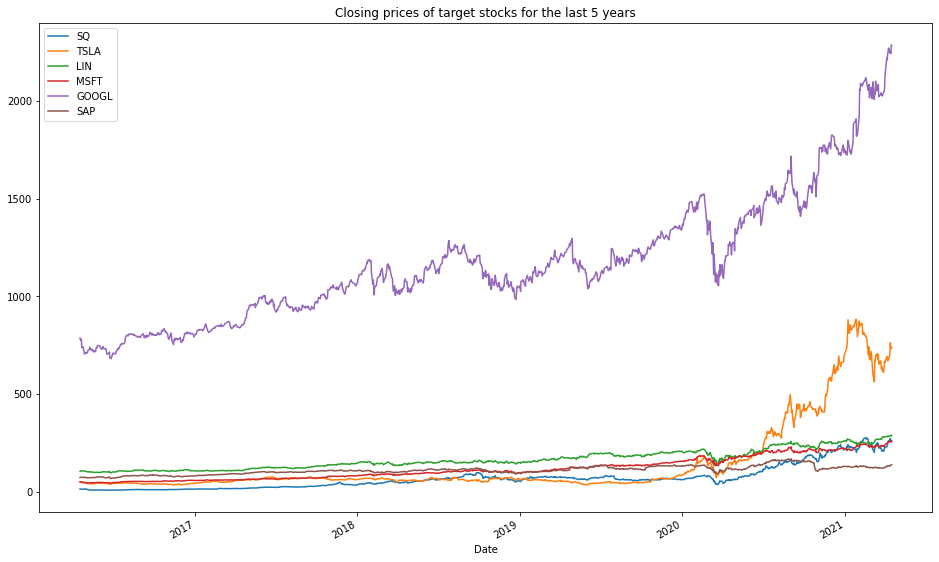

In [8]:
first = True
for stock in target_stock_tickers:
    if first:
        df[stock].plot(label=stock, figsize=(16,10), title='Closing prices of target stocks for the last 5 years')
        first = False
    else:        
        df[stock].plot(label=stock)
    
plt.legend()

# df[square].plot(label=square, figsize=(16,10), title='Closing prices of target stocks for the last 5 years')
# df[tesla].plot(label=tesla)
# df[linde].plot(label=linde)
# df[microsoft].plot(label=microsoft)
# df[google].plot(label=google)
# df[sap].plot(label=sap)
# plt.legend()

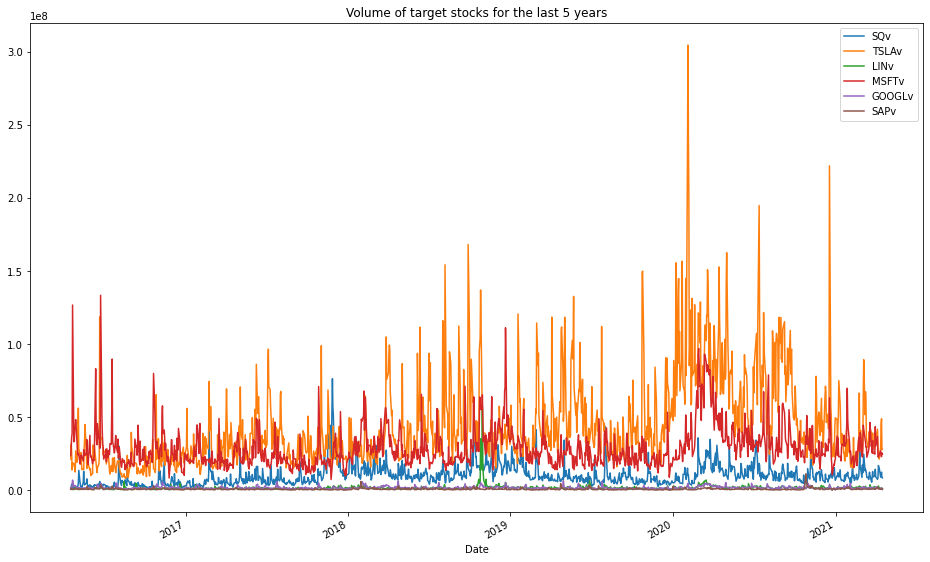

In [9]:
first = True
for vol in target_stock_volume:
    if first:
        df[vol].plot(label=vol, 
                       figsize=(16,10), 
                       title='Volume of target stocks for the last 5 years')
        first = False
    else:        
        df[vol].plot(label=vol)
    
plt.legend()

In [10]:
print(tesla, 'hit high of', df[teslav].max(), 'traded volume on', df[teslav].idxmax())

TSLA hit high of 304694000 traded volume on 2020-02-04 00:00:00


In [11]:
dfdiff = df.diff()
dfdiff.head()

,SQ,SQv,TSLA,TSLAv,LIN,LINv,MSFT,MSFTv,GOOGL,GOOGLv,SAP,SAPv
Date,,,,,,,,,,,,
2016-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-19,-0.42,1154500.0,-1.302002,10430500.0,2.433830,337900.0,-0.064186,5810800.0,-11.429993,520600.0,1.199318,756700.0
2016-04-20,-0.46,1672700.0,0.520000,-5817000.0,0.423676,-146900.0,-0.733578,6598900.0,-1.330017,-484500.0,-0.074371,127000.0
2016-04-21,-0.39,-2126100.0,-0.335999,-12055000.0,-0.396637,-505800.0,0.174225,2713400.0,5.080017,2168300.0,-0.399773,-713000.0
2016-04-22,0.10,-498700.0,1.091999,5016000.0,0.694099,84800.0,-3.667877,87925000.0,-42.229980,3158500.0,0.074364,29900.0


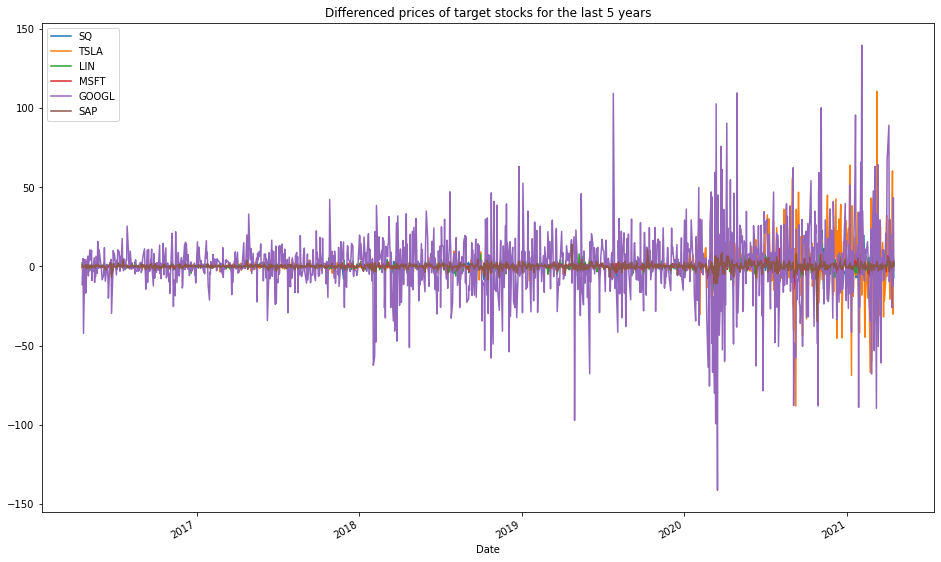

In [12]:
first = True
for stock in target_stock_tickers:
    if first:
        dfdiff[stock].plot(label=stock, 
                       figsize=(16,10), 
                       title='Differenced prices of target stocks for the last 5 years')
        first = False
    else:        
        dfdiff[stock].plot(label=stock)
    
plt.legend()

# df_diff[square].plot(label=square, figsize=(16,10), title='Differenced prices of target stocks for the last 5 years')
# df_diff[tesla].plot(label=tesla)
# df_diff[linde].plot(label=linde)
# df_diff[microsoft].plot(label=microsoft)
# df_diff[google].plot(label=google)
# df_diff[sap].plot(label=sap)
# plt.legend()

In [14]:
dfclose = df[[square, tesla, linde, microsoft, google, sap]].copy()
# dfclose[tesla] = df[tesla] #, df[linde], df[microsoft], df[google], df[sap]])
dfclose.head()

,SQ,TSLA,LIN,MSFT,GOOGL,SAP
Date,,,,,,
2016-04-18,14.51,50.776001,104.673485,51.772221,787.679993,73.763023
2016-04-19,14.09,49.473999,107.107315,51.708035,776.250000,74.962341
2016-04-20,13.63,49.993999,107.530991,50.974457,774.919983,74.887970
2016-04-21,13.24,49.658001,107.134354,51.148682,780.000000,74.488197
2016-04-22,13.34,50.750000,107.828453,47.480804,737.770020,74.562561


/home/leoroi/.local/share/virtualenvs/pipenvJupyter-syI1KNz6/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


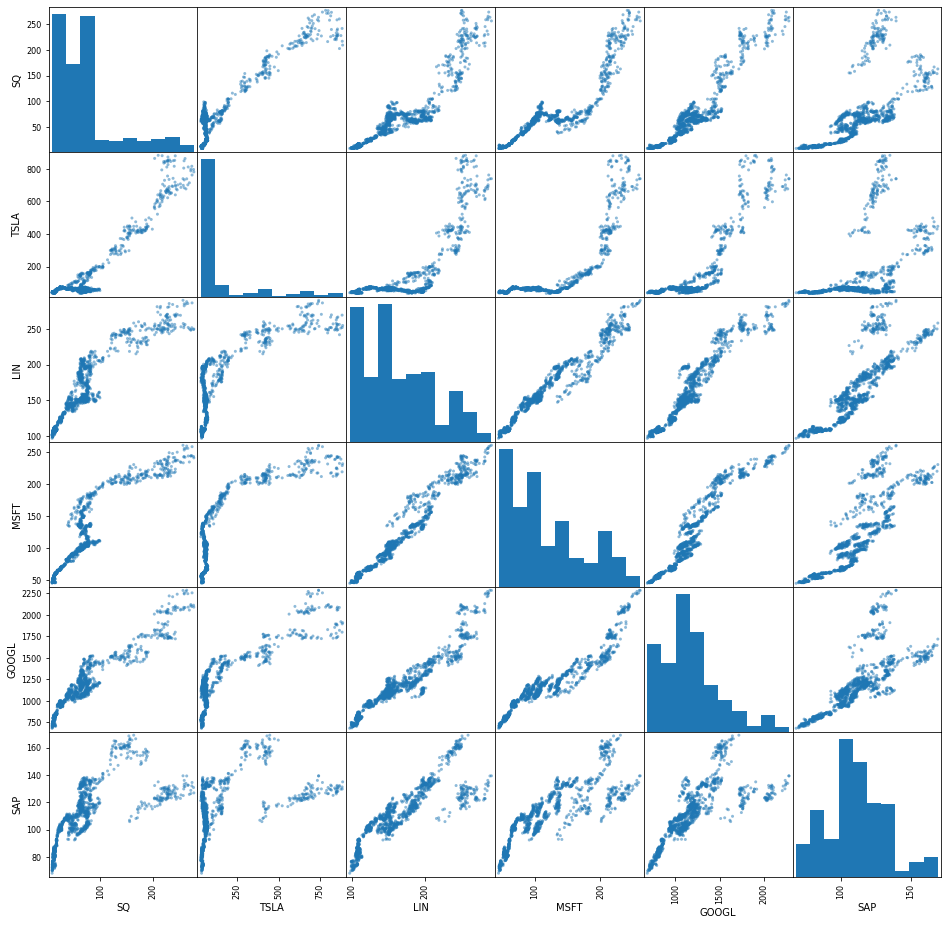

In [15]:
scatter_matrix(dfclose, figsize=(16, 16));

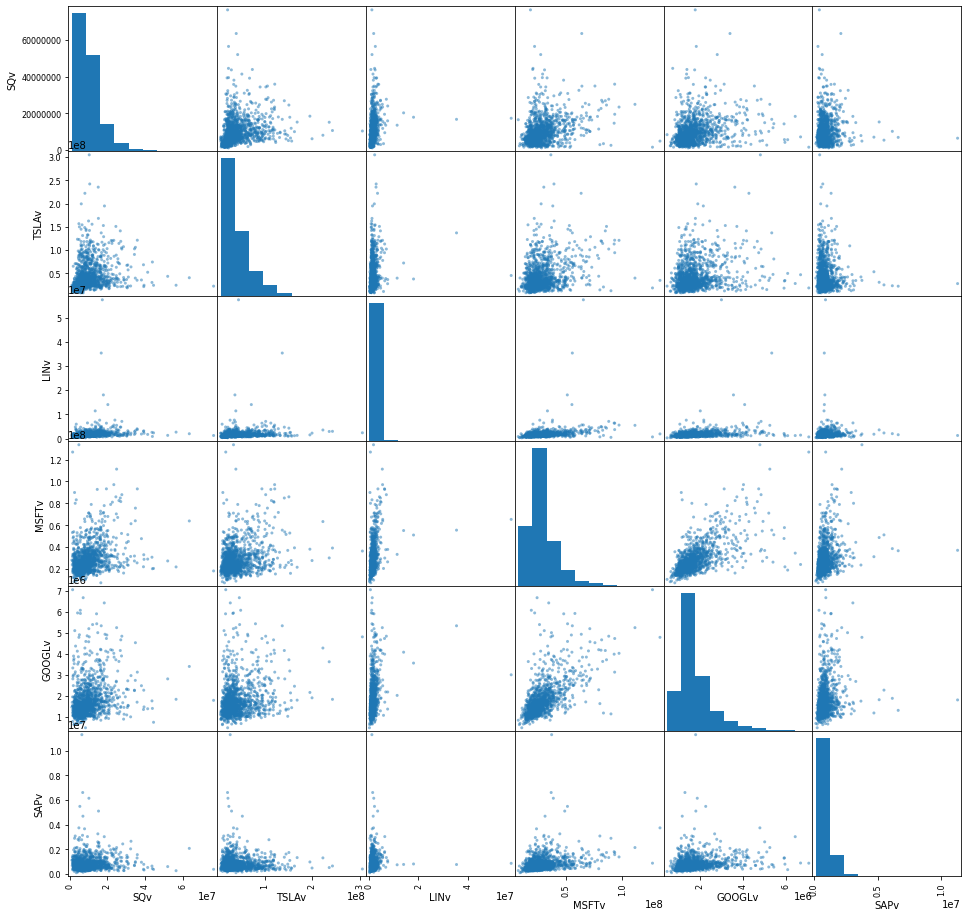

In [16]:
dfvolume = df[[squarev, teslav, lindev, microsoftv, googlev, sapv]].copy()
scatter_matrix(dfvolume, figsize=(16, 16));

In [17]:
df.head()

,SQ,SQv,TSLA,TSLAv,LIN,LINv,MSFT,MSFTv,GOOGL,GOOGLv,SAP,SAPv
Date,,,,,,,,,,,,
2016-04-18,14.51,1384700,50.776001,21357000,104.673485,888300,51.772221,23786000,787.679993,1677000,73.763023,690400
2016-04-19,14.09,2539200,49.473999,31787500,107.107315,1226200,51.708035,29596800,776.250000,2197600,74.962341,1447100
2016-04-20,13.63,4211900,49.993999,25970500,107.530991,1079300,50.974457,36195700,774.919983,1713100,74.887970,1574100
2016-04-21,13.24,2085800,49.658001,13915500,107.134354,573500,51.148682,38909100,780.000000,3881400,74.488197,861100
2016-04-22,13.34,1587100,50.750000,18931500,107.828453,658300,47.480804,126834100,737.770020,7039900,74.562561,891000


In [18]:
# returns
df[square + 'r'] = df[square].pct_change(1)
dfreturns = df[[square + 'r']].copy()
dfreturns = dfreturns.rename(columns={square + 'r': square})

dfreturns[tesla] = df[tesla].pct_change(1)

dfreturns[linde] = df[linde].pct_change(1)
dfreturns[microsoft] = df[microsoft].pct_change(1)

dfreturns[google] = df[google].pct_change(1)
dfreturns[sap] = df[sap].pct_change(1)

dfreturns.head()

,SQ,TSLA,LIN,MSFT,GOOGL,SAP
Date,,,,,,
2016-04-18,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-19,-0.028946,-0.025642,0.023252,-0.001240,-0.014511,0.016259
2016-04-20,-0.032647,0.010511,0.003956,-0.014187,-0.001713,-0.000992
2016-04-21,-0.028613,-0.006721,-0.003689,0.003418,0.006556,-0.005338
2016-04-22,0.007553,0.021990,0.006479,-0.071710,-0.054141,0.000998


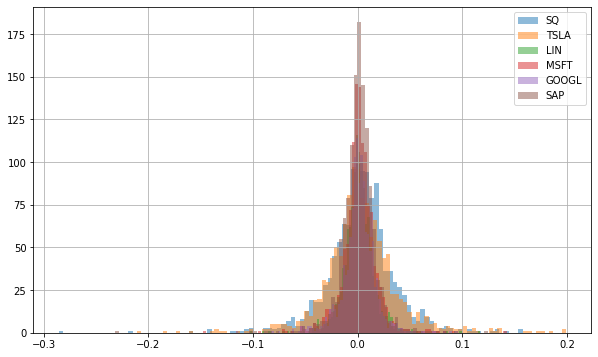

In [19]:
dfreturns[square].hist(bins=100, label=square, alpha=POINT_FIVE, figsize=(10, 6))
dfreturns[tesla].hist(bins=100, label=tesla, alpha=POINT_FIVE)
dfreturns[linde].hist(bins=100, label=linde, alpha=POINT_FIVE)
dfreturns[microsoft].hist(bins=100, label=microsoft, alpha=POINT_FIVE)
dfreturns[google].hist(bins=100, label=google, alpha=POINT_FIVE)
dfreturns[sap].hist(bins=100, label=sap, alpha=POINT_FIVE)
plt.legend()

<AxesSubplot:>

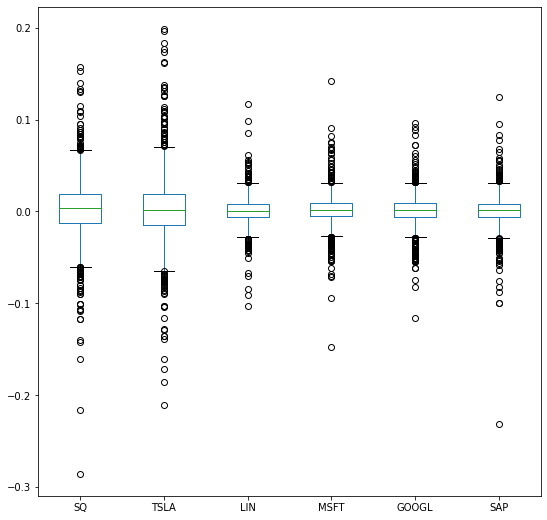

In [20]:
dfreturns.plot(kind='box', figsize=(9,9))

/home/leoroi/.local/share/virtualenvs/pipenvJupyter-syI1KNz6/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


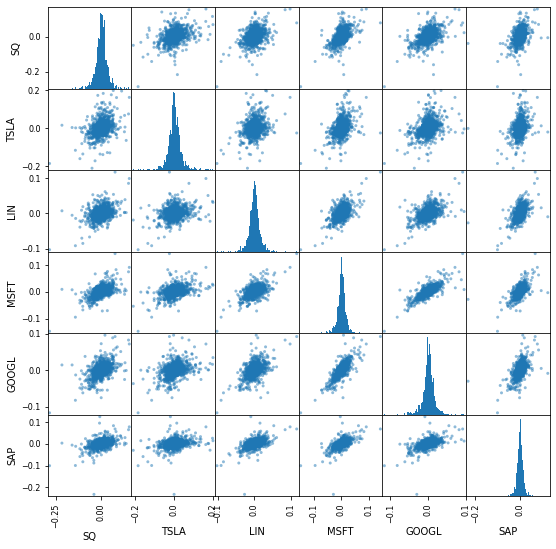

In [21]:
scatter_matrix(dfreturns, figsize=(9,9), hist_kwds={'bins':100});

In [22]:
# cumulative returns
dfreturns_cumulative = pd.DataFrame(index=dfreturns.index.copy())

dfreturns_cumulative[square] = (1 + dfreturns[square]).cumprod()
dfreturns_cumulative[tesla] = (1 + dfreturns[tesla]).cumprod()

dfreturns_cumulative[linde] = (1 + dfreturns[linde]).cumprod()
dfreturns_cumulative[microsoft] = (1 + dfreturns[microsoft]).cumprod()

dfreturns_cumulative[google] = (1 + dfreturns[google]).cumprod()
dfreturns_cumulative[sap] = (1 + dfreturns[sap]).cumprod()

dfreturns_cumulative.tail()

,SQ,TSLA,LIN,MSFT,GOOGL,SAP
Date,,,,,,
2021-04-12,18.277051,13.825035,2.726861,4.942998,2.849660,1.794937
2021-04-13,18.830462,15.013392,2.735077,4.992832,2.862114,1.822458
2021-04-14,17.808407,14.420789,2.723230,4.936817,2.846219,1.843336
2021-04-15,18.130943,14.551165,2.751127,5.012341,2.901242,1.887124
2021-04-16,17.649897,14.569482,2.770138,5.036291,2.898068,1.888480


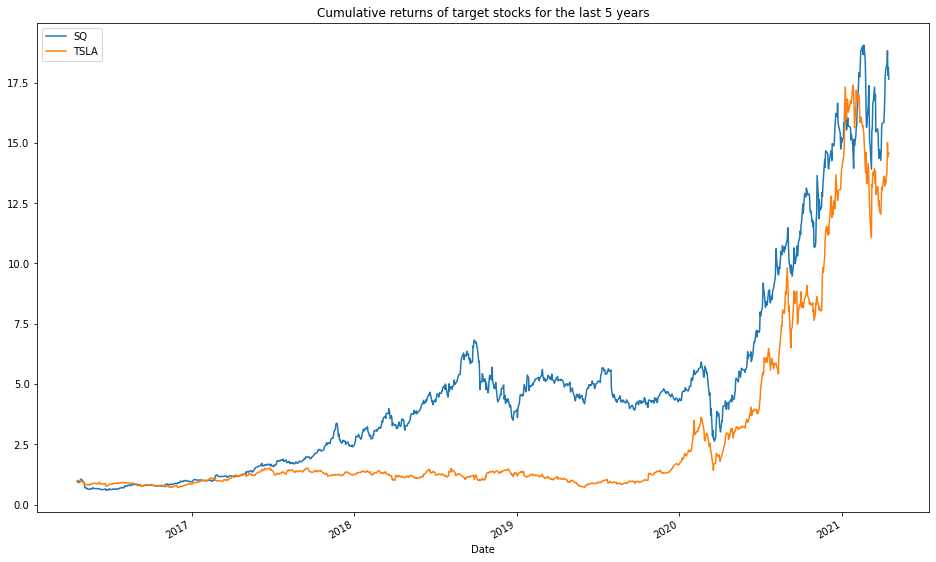

In [23]:
dfreturns_cumulative[square].plot(label=square, figsize=(16,10), title='Cumulative returns of target stocks for the last 5 years')
dfreturns_cumulative[tesla].plot(label=tesla)
plt.legend()

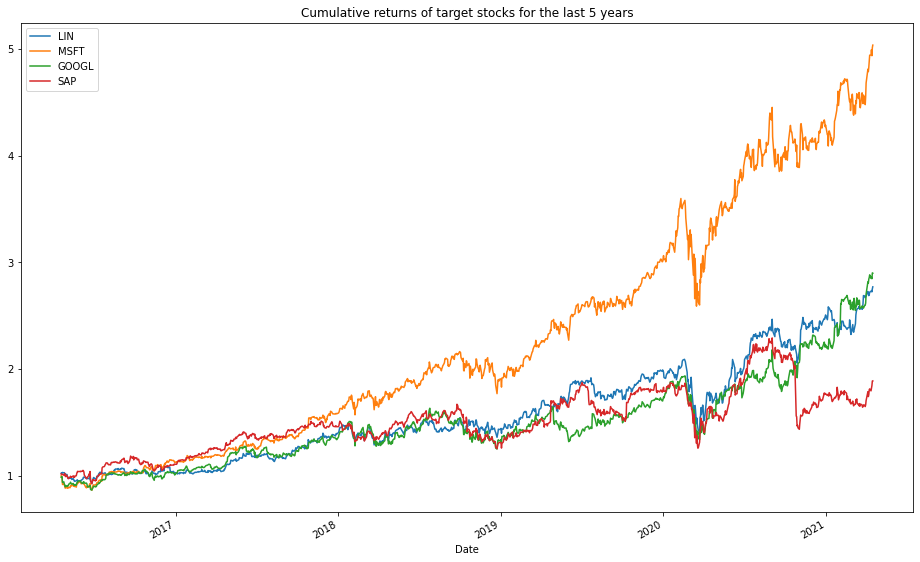

In [24]:
dfreturns_cumulative[linde].plot(label=linde, figsize=(16,10), title='Cumulative returns of target stocks for the last 5 years')
dfreturns_cumulative[microsoft].plot(label=microsoft)
dfreturns_cumulative[google].plot(label=google)
dfreturns_cumulative[sap].plot(label=sap)
plt.legend()

<AxesSubplot:xlabel='Date'>

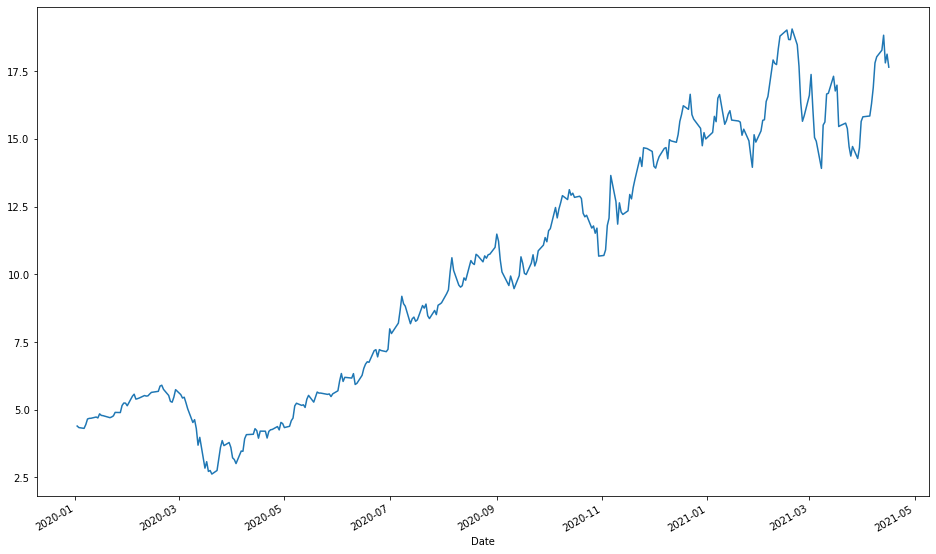

In [25]:
dfreturns_cumulative[square]['2020-01-01':].plot(label=square, figsize=(16,10))

### statsmodels

In [26]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
sqser = df[square] # avoid auto boxing into series
print(type(sqser))
sqser.index

<class 'pandas.core.series.Series'>


DatetimeIndex(['2016-04-18', '2016-04-19', '2016-04-20', '2016-04-21',
               '2016-04-22', '2016-04-25', '2016-04-26', '2016-04-27',
               '2016-04-28', '2016-04-29',
               ...
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [28]:
# sqser.index = pd.DatetimeIndex(sqser.index).to_period('B') 
# set index frequency to daily business, as it was string

print(sqser.head())
print(sqser.index)
sqser.describe().T # same as transpose()

Date
2016-04-18    14.51
2016-04-19    14.09
2016-04-20    13.63
2016-04-21    13.24
2016-04-22    13.34
Name: SQ, dtype: float64
DatetimeIndex(['2016-04-18', '2016-04-19', '2016-04-20', '2016-04-21',
               '2016-04-22', '2016-04-25', '2016-04-26', '2016-04-27',
               '2016-04-28', '2016-04-29',
               ...
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)


count    1259.000000
mean       70.523288
std        60.864938
min         8.620000
25%        24.830000
50%        61.840000
75%        77.344997
max       276.570007
Name: SQ, dtype: float64

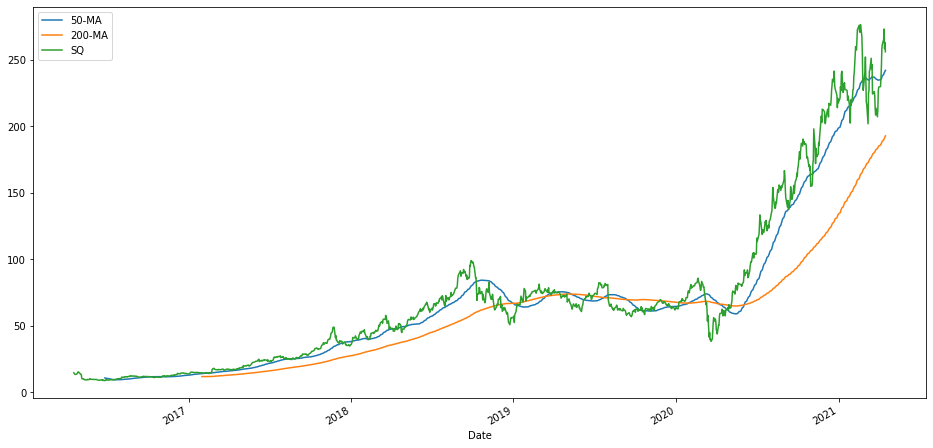

In [29]:
ma50 = sqser.rolling(FIFTY).mean()
ma200 = sqser.rolling(TWO_HUNDRED).mean()

ma50.plot(label='50-MA', figsize=(16,8))
ma200.plot(label='200-MA')

sqser.plot(label=square)
plt.legend()

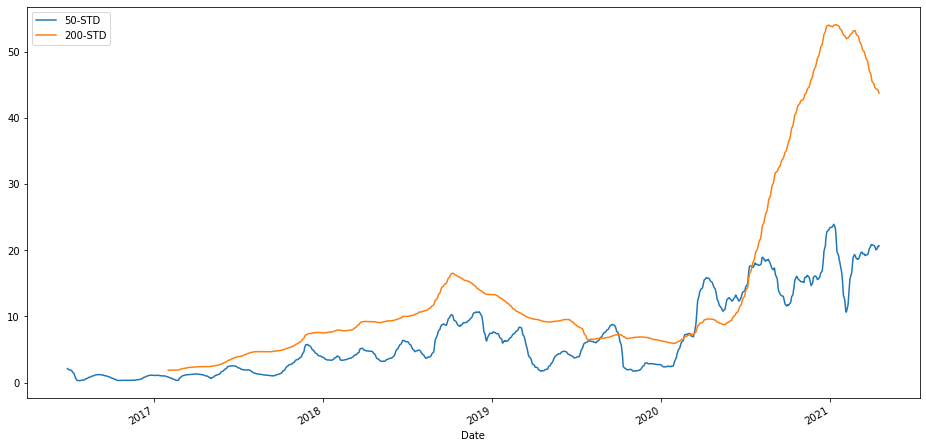

In [30]:
std50 = sqser.rolling(FIFTY).std()
std200 = sqser.rolling(TWO_HUNDRED).std()

std50.plot(label='50-STD', figsize=(16, 8))
std200.plot(label='200-STD')
plt.legend()

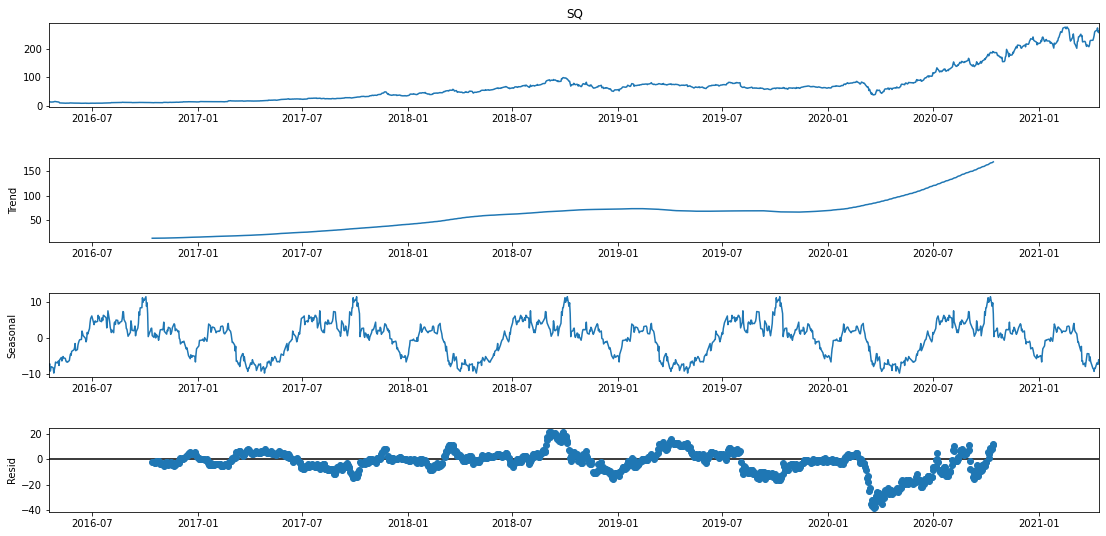

In [62]:
sqdecomp = seasonal_decompose(sqser, period=253) # 253 is the average number of trading days per year

# works only with series object
sqdecomp_fig = sqdecomp.plot()
sqdecomp_fig.set_size_inches(SIXTEEN_BY_EIGHT)

# pronounced trend over time, seasonality ?

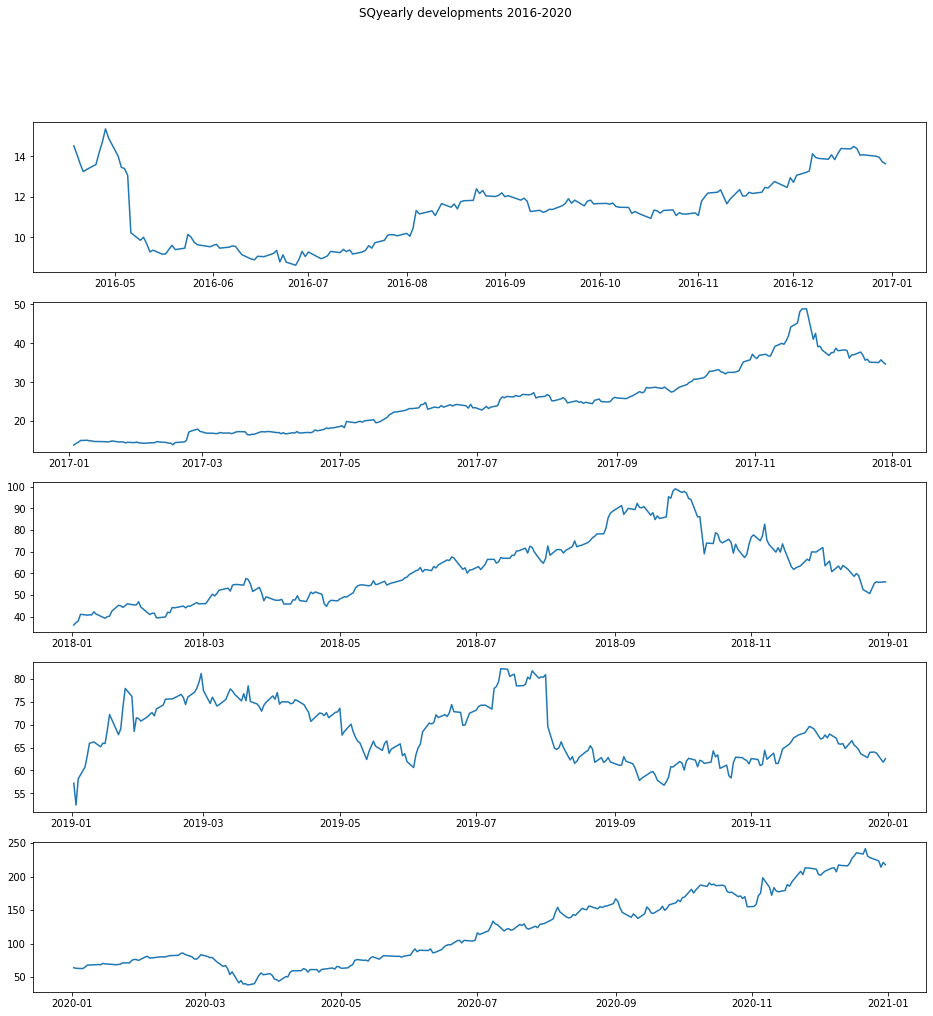

In [83]:
# is there seasonality?
fig, axs = plt.subplots(5, figsize=(16,16))
fig.suptitle(square + ' yearly developments 2016-2020')

year = 2016
for ax in axs:
    ax.plot(sqser[str(year)])
    year = year + 1

plt.show()

In [32]:
# stationarity
from statsmodels.tsa.stattools import adfuller

def adfuller_check(ts):
    res = adfuller(ts)
    print('Augmented Dicky-Fuller test:')
    labels = ['ADS test statistic', 'p-value', '# of lags', '# of observations']
    
    for value, label in zip(res, labels):
        print('\t' + label + ': ' + str(value))
        
    if res[1] <= 0.05:
        print('>> data has no unit root and is therefore stationary')
    else:
        print('>> failed to reject null hypothesis (ts not stationary)')

In [33]:
adfuller_check(sqser)

Augmented Dicky-Fuller test:
	ADS test statistic: 1.912231516867537
	p-value: 0.9985474456728964
	# of lags: 23
	# of observations: 1235
>> failed to reject null hypothesis (ts not stationary)


In [34]:
sqdf = pd.DataFrame(sqser)
sqdf

,SQ
Date,
2016-04-18,14.510000
2016-04-19,14.090000
2016-04-20,13.630000
2016-04-21,13.240000
2016-04-22,13.340000
...,...
2021-04-12,265.200012
2021-04-13,273.230011
2021-04-14,258.399994


In [35]:
sqdf = sqdf.asfreq('b')
sqdf.index

DatetimeIndex(['2016-04-18', '2016-04-19', '2016-04-20', '2016-04-21',
               '2016-04-22', '2016-04-25', '2016-04-26', '2016-04-27',
               '2016-04-28', '2016-04-29',
               ...
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16'],
              dtype='datetime64[ns]', name='Date', length=1305, freq='B')

Augmented Dicky-Fuller test:
	ADS test statistic: -7.5927022799436354
	p-value: 2.506856890466967e-11
	# of lags: 21
	# of observations: 1190
>> data has no unit root and is therefore stationary


<AxesSubplot:xlabel='Date'>

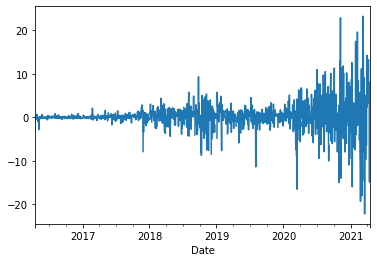

In [36]:
sqdf['diff1'] = sqdf.diff()
adfuller_check(sqdf['diff1'].dropna()) # first value missing
sqdf['diff1'].plot()

Augmented Dicky-Fuller test:
	ADS test statistic: -10.297312521160007
	p-value: 3.4441562923906397e-18
	# of lags: 17
	# of observations: 1147
>> data has no unit root and is therefore stationary


<AxesSubplot:xlabel='Date'>

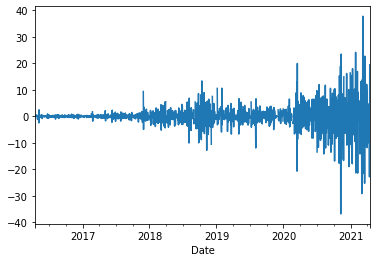

In [37]:
sqdf['diff2'] = sqdf['diff1'].diff()
adfuller_check(sqdf['diff2'].dropna())
sqdf['diff2'].plot()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

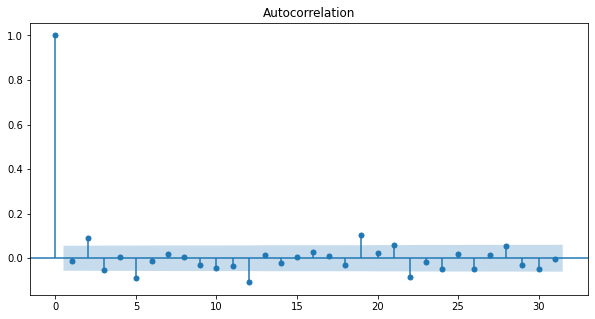

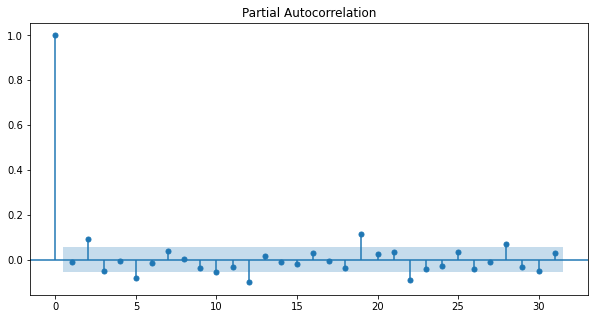

In [39]:
plt.rc("figure", figsize = TEN_BY_FIVE)
acffig = plot_acf(sqdf['diff1'].dropna())
pacffig = plot_pacf(sqdf['diff1'].dropna())

In [104]:
model = sm.tsa.statespace.SARIMAX(sqdf[square], order=(1,1,1))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     SQ   No. Observations:                 1305
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3331.499
Date:                Thu, 22 Apr 2021   AIC                           6668.999
Time:                        13:11:37   BIC                           6684.519
Sample:                    04-18-2016   HQIC                          6674.821
                         - 04-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7913      0.064    -12.299      0.000      -0.917      -0.665
ma.L1          0.7365      0.072     10.258      0.000       0.596       0.877
sigma2        11.4148      0.183     62.377      0.000      11.056      11.773
===================================================================================
Ljung-Box (L1) (Q):                   3.49   Jarque-Bera (JB):              6948.53
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):              68.07   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/leoroi/.local/share/virtualenvs/pipenvJupyter-syI1KNz6/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


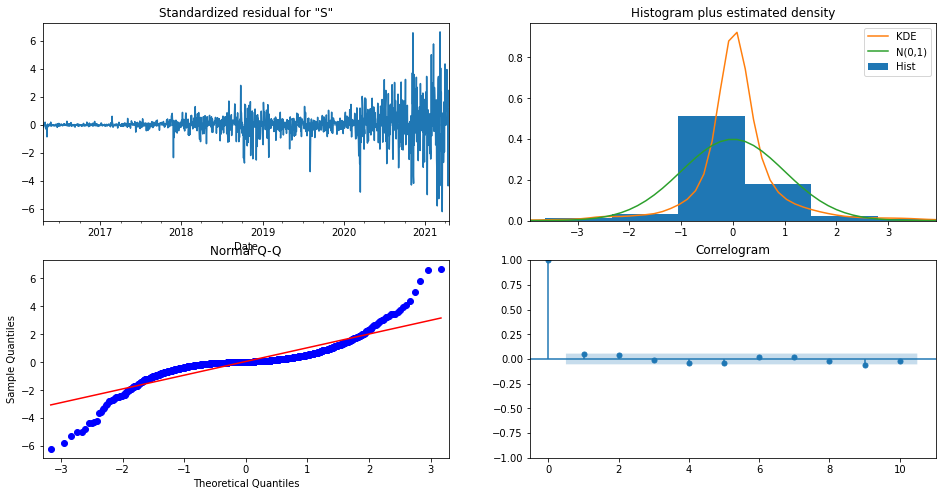

In [43]:
fig1 = res.plot_diagnostics(figsize=SIXTEEN_BY_EIGHT)

<AxesSubplot:xlabel='Date'>

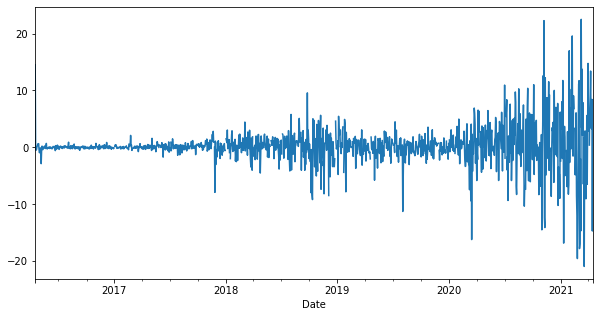

In [44]:
res.resid.plot()

<AxesSubplot:ylabel='Density'>

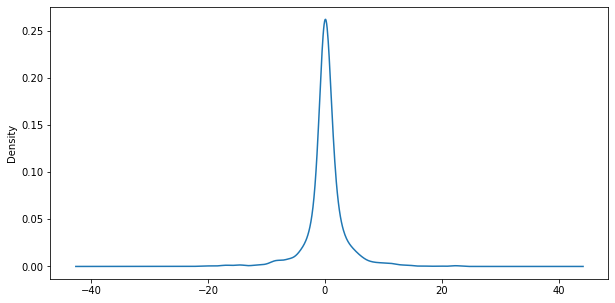

In [45]:
res.resid.plot(kind='kde')

In [46]:
from datetime import timedelta
print(last_date)
some_time_ago = last_date - timedelta(days=30)

2021-04-16 00:00:00


In [47]:
sqdf[BT] = res.predict(start = some_time_ago, end = last_date)
print(sqdf[BT].mean())
sqdf.tail()

235.71402667915913


,SQ,diff1,diff2,Backtest
Date,,,,
2021-04-12,265.200012,3.550018,0.270020,261.926671
2021-04-13,273.230011,8.029999,4.479980,264.800753
2021-04-14,258.399994,-14.830017,-22.860016,273.082786
2021-04-15,263.079987,4.679993,19.510010,259.322188
2021-04-16,256.100006,-6.979980,-11.659973,262.144176


<AxesSubplot:xlabel='Date'>

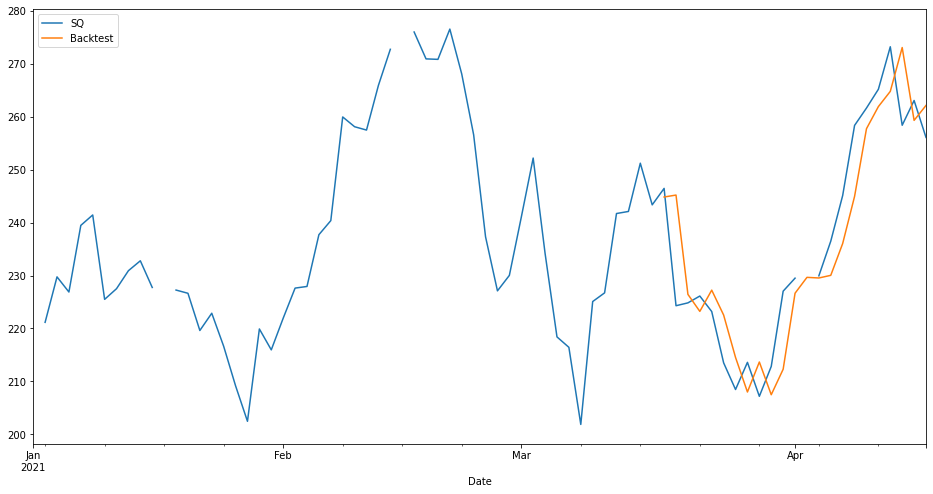

In [48]:
sqdf[[square, BT]]['2021-01-01':].plot(figsize = SIXTEEN_BY_EIGHT)

In [49]:
sqdf['2021-02-09':'2021-02-20']

,SQ,diff1,diff2,Backtest
Date,,,,
2021-02-09,258.119995,-1.850006,-21.440002,NaN
2021-02-10,257.489990,-0.630005,1.220001,NaN
2021-02-11,265.929993,8.440002,9.070007,NaN
2021-02-12,272.750000,6.820007,-1.619995,NaN
2021-02-15,NaN,NaN,NaN,NaN
2021-02-16,276.019989,NaN,NaN,NaN
2021-02-17,270.940002,-5.079987,NaN,NaN
2021-02-18,270.850006,-0.089996,4.989990,NaN
2021-02-19,276.570007,5.720001,5.809998,NaN


In [52]:
sqdf.loc['2019-04-08']

SQ          75.000000
diff1       -0.029999
diff2       -0.540001
Backtest          NaN
Name: 2019-04-08 00:00:00, dtype: float64

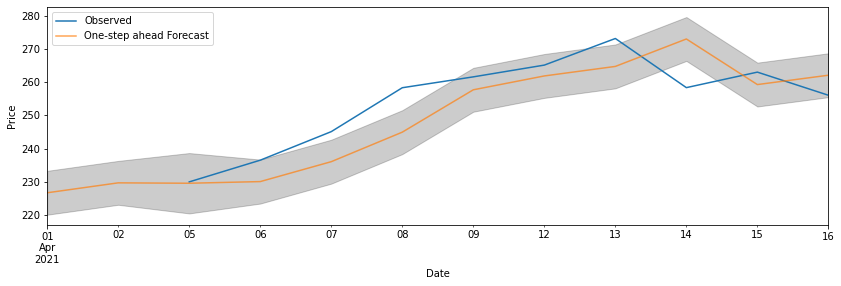

In [60]:
pred_uc = res.get_prediction(start=pd.to_datetime('2021-04-01'), dynamic=False)
pred_ci = pred_uc.conf_int()

ax = sqdf[square]['2021-04-01':].plot(label = OB)
pred_uc.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

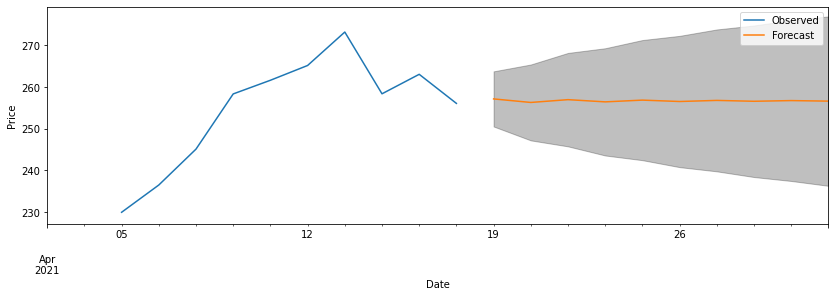

2021-04-19    257.171825
2021-04-20    256.323661
2021-04-21    256.994840
2021-04-22    256.463715
2021-04-23    256.884011
2021-04-26    256.551418
2021-04-27    256.814609
2021-04-28    256.606338
2021-04-29    256.771149
2021-04-30    256.640729
Freq: B, Name: predicted_mean, dtype: float64


In [113]:
pred_uc2 = res.get_forecast(steps=10)
pred_ci2 = pred_uc2.conf_int()

ax = sqdf[square]['2021-04-01':].plot(label = OB, figsize=(14, 4))
pred_uc2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

print(pred_uc2.predicted_mean)

In [ ]:
# ets_AAdA=sm.tsa.statespace.ExponentialSmoothing(sqdf[square],
#                                            trend=True, 
#                                            initialization_method= 'heuristic', 
#                                            damped_trend=True).fit()

# print(ets_AAdA.forecast(10))
# ets_AAdA.forecast(10).plot()
# sqdf[square]['2021-04-01':].plot()

### log transformation

In [91]:
sqdf['log'] = np.log(sqdf[square])
sqdf.head()

,SQ,diff1,diff2,Backtest,log
Date,,,,,
2016-04-18,14.51,NaN,NaN,NaN,2.674838
2016-04-19,14.09,-0.42,NaN,NaN,2.645465
2016-04-20,13.63,-0.46,-0.040000,NaN,2.612273
2016-04-21,13.24,-0.39,0.070000,NaN,2.583243
2016-04-22,13.34,0.10,0.490001,NaN,2.590767


Augmented Dicky-Fuller test:
	ADS test statistic: -15.36568631167649
	p-value: 3.5635355029365237e-28
	# of lags: 5
	# of observations: 1206
>> data has no unit root and is therefore stationary


<AxesSubplot:xlabel='Date'>

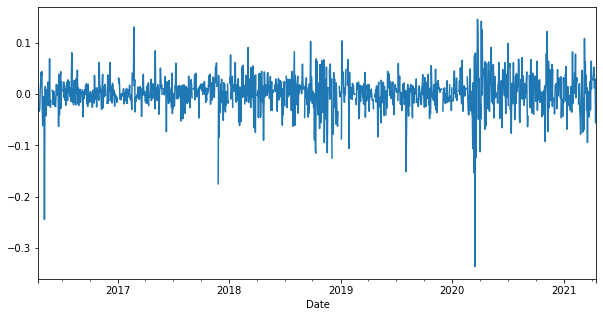

In [94]:
sqdf['ldiff1'] = sqdf['log'].diff()
adfuller_check(sqdf['ldiff1'].dropna())
sqdf['ldiff1'].plot()

In [99]:
np.log(2)

0.6931471805599453

In [101]:
np.e**0.6931471805599453

1.9999999999999998

In [102]:
sqdf['detransf'] = np.e ** sqdf['log']

In [103]:
sqdf.head()

,SQ,diff1,diff2,Backtest,log,ldiff1,detransf
Date,,,,,,,
2016-04-18,14.51,NaN,NaN,NaN,2.674838,NaN,14.51
2016-04-19,14.09,-0.42,NaN,NaN,2.645465,-0.029373,14.09
2016-04-20,13.63,-0.46,-0.040000,NaN,2.612273,-0.033192,13.63
2016-04-21,13.24,-0.39,0.070000,NaN,2.583243,-0.029031,13.24
2016-04-22,13.34,0.10,0.490001,NaN,2.590767,0.007525,13.34


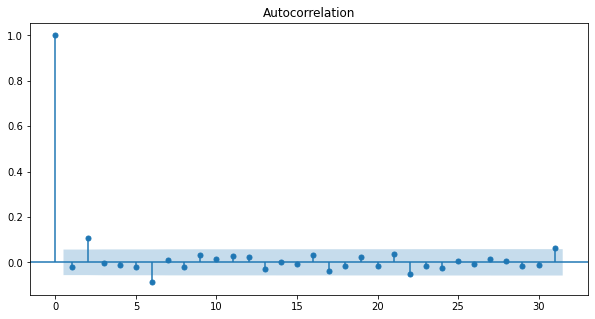

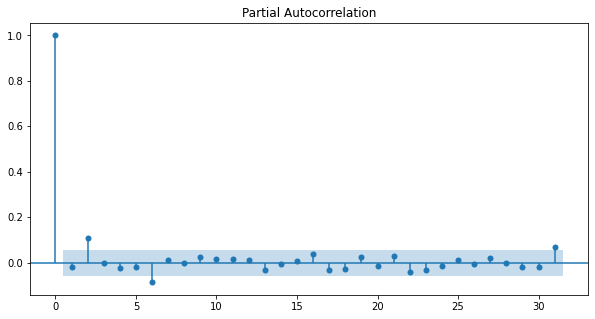

In [106]:
acffig2 = plot_acf(sqdf['ldiff1'].dropna())
pacffig2 = plot_pacf(sqdf['ldiff1'].dropna())

In [108]:
arima = sm.tsa.statespace.SARIMAX(sqdf['log'], order=(1,1,1))
arimafit = arima.fit()
arimafit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    log   No. Observations:                 1305
Model:               SARIMAX(1, 1, 1)   Log Likelihood                2443.060
Date:                Thu, 22 Apr 2021   AIC                          -4880.119
Time:                        13:13:51   BIC                          -4864.600
Sample:                    04-18-2016   HQIC                         -4874.297
                         - 04-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5870      0.174     -3.376      0.001      -0.928      -0.246
ma.L1          0.5258      0.182      2.884      0.004       0.169       0.883
sigma2         0.0012   1.95e-05     60.431      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   2.28   Jarque-Bera (JB):              7974.11
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               2.24   Skew:                            -1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

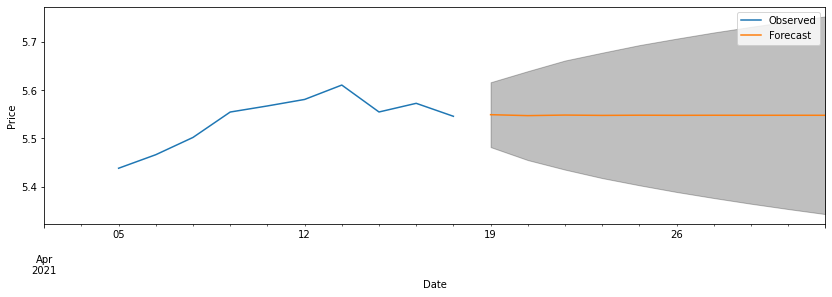

2021-04-19    5.548912
2021-04-20    5.546949
2021-04-21    5.548101
2021-04-22    5.547425
2021-04-23    5.547822
2021-04-26    5.547589
2021-04-27    5.547726
2021-04-28    5.547646
2021-04-29    5.547693
2021-04-30    5.547665
Freq: B, Name: predicted_mean, dtype: float64


In [112]:
pred_uc3 = arimafit.get_forecast(steps=10)
pred_ci3 = pred_uc3.conf_int()

ax = sqdf['log']['2021-04-01':].plot(label = OB, figsize=(14, 4))
pred_uc3.predicted_mean.plot(ax=ax, label = FC)
ax.fill_between(pred_ci3.index,
                pred_ci3.iloc[:, 0],
                pred_ci3.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

print(pred_uc3.predicted_mean)